# Fussing about

In [30]:
# imports
import os
from importlib import resources

import numpy as np
from scipy.io import loadmat

import seaborn as sns
from matplotlib import pyplot as plt

In [29]:
%matplotlib ipympl

# Load

In [4]:
mat_file = os.path.join(resources.files('oceancolor'), 'data', 'Dye',
                        'SampleHyperspectralImagerySpectra.mat')

In [5]:
mat = loadmat(mat_file)

In [7]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'bubbles', 'dye', 'wavelengths'])

# Unpack

In [9]:
mat['wavelengths'].shape

(273, 1)

In [10]:
wave = mat['wavelengths'].flatten()

## Dye

In [33]:
dye = np.zeros((5,273))
for ss in range(5):
    dye[ss,:] = mat['dye'][0][0][0].flatten()

In [21]:
mat['dye'][0][0][0].shape

(273, 1)

## Bubbles

In [32]:
bubb = np.zeros((5,273))
for ss in range(5):
    bubb[ss,:] = mat['bubbles'][0][0][0].flatten()

# Explore

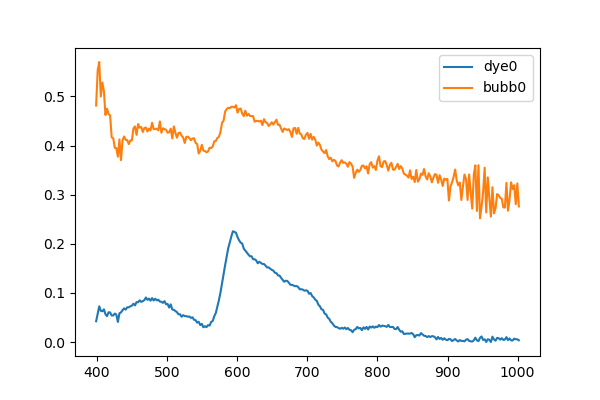

In [37]:
fig = plt.figure(figsize=(6,4))
plt.clf()
ax = plt.gca()
#
ax.plot(wave, dye[0,:], label='dye0')
ax.plot(wave, bubb[0,:], label='bubb0')

ax.legend()
plt.show()